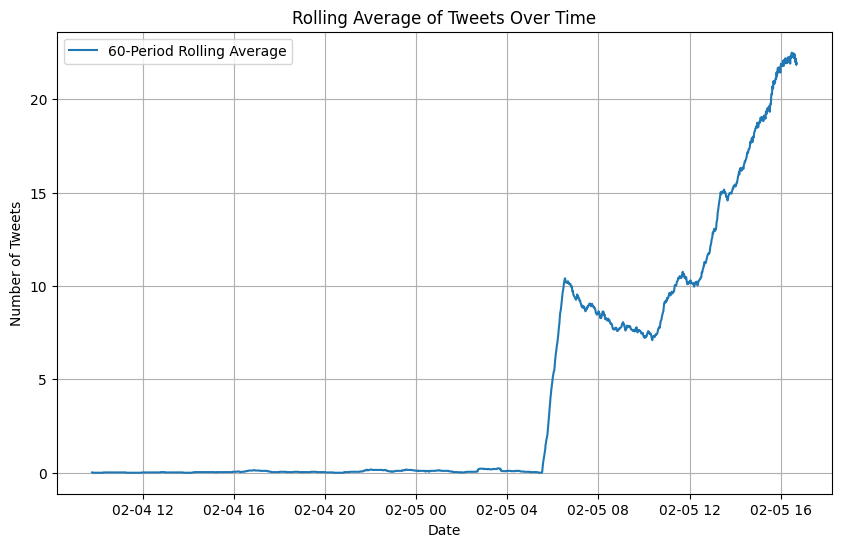

: 

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime

# Load tweets from a JSONL file
def load_tweets(file_path):
    tweets = []
    with open(file_path, 'r') as file:
        for line in file:
            tweet = json.loads(line)
            tweets.append({'date': tweet['date'], 'tweet': 1})  # Assuming each line is a tweet
    return pd.DataFrame(tweets)

# Function to filter tweets, plot rolling average with adjustable granularity, start, and end dates
def plot_rolling_average(file_path, start_date, end_date, granularity='D', rolling_window=7):
    """
    Filter tweets by start and end date, then plot the rolling average of tweets over time.

    Parameters:
    - file_path: Path to the JSONL file containing tweet data.
    - start_date: Start date as a string in 'YYYY-MM-DD HH:MM' format.
    - end_date: End date as a string in 'YYYY-MM-DD HH:MM' format.
    - granularity: Resampling granularity ('T' for minute, 'H' for hour, 'D' for day, etc.).
    - rolling_window: The window size for calculating the rolling average, in terms of the number of periods.
    """
    df = load_tweets(file_path)
    df['date'] = pd.to_datetime(df['date'])  # Convert date to datetime
    df.set_index('date', inplace=True)

    # Filter based on start and end date
    mask = (df.index >= start_date) & (df.index <= end_date)
    filtered_df = df.loc[mask]

    # Resample and aggregate data based on the specified granularity
    resampled_df = filtered_df.resample(granularity).count()

    # Calculate the rolling average
    rolling_avg = resampled_df.rolling(window=rolling_window).mean()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_avg, label=f'{rolling_window}-Period Rolling Average')
    plt.title('Rolling Average of Tweets Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Tweets')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
file_path = 'english_tweets.jsonl'
start_date = '2024-02-04 06:00'
end_date = '2024-02-05 18:00'
plot_rolling_average(file_path, start_date, end_date, granularity='T', rolling_window=60)